# Cohort Analysis in R

In this excercise, we are assuming that we're running an E-commerce business and we'd like to analyze user retention together with finding out how our users are spending money over time. To learn more about cohort analysis, check out my blog post here.

You could also look at the following posts if you'd like to play around with more plots:
https://medium.com/datascape/cohort-analysis-retention-rate-visualization-in-r-9cccaf821b49
https://stuifbergen.com/2018/03/cohort-analysis-with-snowplow-and-r/

To get started, I first generated my own dummy data with variables ; user/client_ID, Revenue and Date

In [8]:
#loading the necessary libraries
library(lubridate)
library(reshape2)
library(tidyverse)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ .GlobalEnv::date()       masks lubridate::date(), base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [9]:
#generating random dates in the year 2017
date <- as.data.frame(sample(seq(as.Date('2017/01/01'), as.Date('2017/12/31'), by="day"), 500, replace = T))

#generating random revenue values
revenue <- as.data.frame(runif(500, min=0, max=1000))

#generating random user_ID's
users <- as.data.frame(sample(1:300, 500, replace=TRUE))

data <- cbind(date,revenue,users)
colnames(data) <- c("date","revenue","users")


In [10]:
data

date,revenue,users
2017-04-27,37.862689,298
2017-06-26,19.055435,70
2017-04-03,129.468546,107
2017-01-10,152.915360,56
2017-05-27,333.893246,24
2017-12-11,275.745491,289
2017-07-22,730.776905,50
2017-01-29,937.926490,56
2017-04-15,780.019416,200
2017-11-01,364.217102,81


Next, I'd like to change the date format to year and month. So, basically my cohorts will be divided into the month they signed up in 2017.

In [11]:
data$date <- as.character(data$date)
data$month <- month(data$date)
data$year <- year(data$date)


length(unique(data$users))

#changing the date format and grouping by date
data2 <-data %>%
  mutate(date = as.character(date) %>% as.Date(format = "%Y-%m-%d"))
data3<- format(data2, format="%Y-%m")
str(data3)

[1] 254

'data.frame':	500 obs. of  5 variables:
 $ date   :Class 'AsIs'  chr [1:500] "2017-04" "2017-06" "2017-04" "2017-01" ...
 $ revenue:Class 'AsIs'  chr [1:500] " 37.862689" " 19.055435" "129.468546" "152.915360" ...
 $ users  :Class 'AsIs'  chr [1:500] "298" " 70" "107" " 56" ...
 $ month  :Class 'AsIs'  chr [1:500] " 4" " 6" " 4" " 1" ...
 $ year   :Class 'AsIs'  chr [1:500] "2017" "2017" "2017" "2017" ...


This is where we build our cohort table

In [12]:
cohort <- data3 %>% #store data in table called cohort
  group_by(users) %>% #group all the users/clients together
  mutate(first = min(date)) %>% #for every user/client take the first period
  group_by(first, date) %>% #group by this first period + other periods
  summarise(users = n()) %>% #for each combinations, count the number of users
  spread(date, users) #make columns with the period names

In [13]:
cohort

first,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
2017-01,59,4,7,3,10,6,10,7,3,6,NA,6
2017-02,NA,33,3,8,4,3,1,7,5,4,3,2
2017-03,NA,NA,30,3,3,4,3,2,4,4,5,1
2017-04,NA,NA,NA,22,3,6,3,3,2,1,3,4
2017-05,NA,NA,NA,NA,28,3,5,3,6,1,6,4
2017-06,NA,NA,NA,NA,NA,21,2,2,3,2,2,8
2017-07,NA,NA,NA,NA,NA,NA,14,1,1,2,1,1
2017-08,NA,NA,NA,NA,NA,NA,NA,14,3,2,4,2
2017-09,NA,NA,NA,NA,NA,NA,NA,NA,13,2,1,2
2017-10,NA,NA,NA,NA,NA,NA,NA,NA,NA,16,3,2


In [16]:
#align the table created a bove to the left like a normal cohort table starting from column 2
shiftrow <- function(v){
  #put a vactor in, strip off leading NA values, and place that amount at the end
  first_na_index <- min(which(!is.na(v)))
  
  #return that bit to the end, and pad with NA's
  c(v[first_na_index:length(v)], rep(NA, first_na_index-1))
}

#create a new dataframe, with shifted rows(ad keep the first row)
shifted <- data.frame(
  cohort = cohort$first,
  t(apply(select(as.data.frame(cohort), 2:ncol(cohort)), #from the 2nd column to the end
          1, #for every row
          shiftrow
  ))
)

#make the column names readable
#first should be "cohort" and the rest dates

colnames(shifted) <-c("cohort", sub("","month.", str_pad(1:(ncol(shifted)-1),2, pad = "0")))

In [17]:
shifted

cohort,month.01,month.02,month.03,month.04,month.05,month.06,month.07,month.08,month.09,month.10,month.11,month.12
2017-01,59,4,7,3,10,6,10,7,3,6,NA,6
2017-02,33,3,8,4,3,1,7,5,4,3,2,NA
2017-03,30,3,3,4,3,2,4,4,5,1,NA,NA
2017-04,22,3,6,3,3,2,1,3,4,NA,NA,NA
2017-05,28,3,5,3,6,1,6,4,NA,NA,NA,NA
2017-06,21,2,2,3,2,2,8,NA,NA,NA,NA,NA
2017-07,14,1,1,2,1,1,NA,NA,NA,NA,NA,NA
2017-08,14,3,2,4,2,NA,NA,NA,NA,NA,NA,NA
2017-09,13,2,1,2,NA,NA,NA,NA,NA,NA,NA,NA
2017-10,16,3,2,NA,NA,NA,NA,NA,NA,NA,NA,NA


The above table is much more readable:
So, let's try to understand the above cohort table:

As you can see, column one is named cohorts which basically shows the number of users that signed up at a particular month. the column **month.01** shows the first month of each cohort. the first row shows the timeline of the first cohort which was formed in the first month of 2017(2017-01), the second row shows the timeline of the second cohort or group of users that signed up in 2017-01 and so on


Next, let's try and see if we can get the retention rates of each cohort

In [20]:
#percentages
#we want every year and month to be expressed as a percentange
#create new table for this . We divide all year,month columns by the first year,month of that row
shifted_pct <- data.frame(
  cohort = shifted$cohort, #first row
  shifted[,2:nrow(shifted)] / shifted[["month.01"]] #rest:divide by year&month1
)


In [21]:
shifted_pct

cohort,month.01,month.02,month.03,month.04,month.05,month.06,month.07,month.08,month.09,month.10,month.11
2017-01,1,0.06779661,0.11864407,0.05084746,0.16949153,0.10169492,0.16949153,0.1186441,0.05084746,0.10169492,NA
2017-02,1,0.09090909,0.24242424,0.12121212,0.09090909,0.03030303,0.21212121,0.1515152,0.12121212,0.09090909,0.06060606
2017-03,1,0.10000000,0.10000000,0.13333333,0.10000000,0.06666667,0.13333333,0.1333333,0.16666667,0.03333333,NA
2017-04,1,0.13636364,0.27272727,0.13636364,0.13636364,0.09090909,0.04545455,0.1363636,0.18181818,NA,NA
2017-05,1,0.10714286,0.17857143,0.10714286,0.21428571,0.03571429,0.21428571,0.1428571,NA,NA,NA
2017-06,1,0.09523810,0.09523810,0.14285714,0.09523810,0.09523810,0.38095238,NA,NA,NA,NA
2017-07,1,0.07142857,0.07142857,0.14285714,0.07142857,0.07142857,NA,NA,NA,NA,NA
2017-08,1,0.21428571,0.14285714,0.28571429,0.14285714,NA,NA,NA,NA,NA,NA
2017-09,1,0.15384615,0.07692308,0.15384615,NA,NA,NA,NA,NA,NA,NA
2017-10,1,0.18750000,0.12500000,NA,NA,NA,NA,NA,NA,NA,NA


### Plot of retention rate

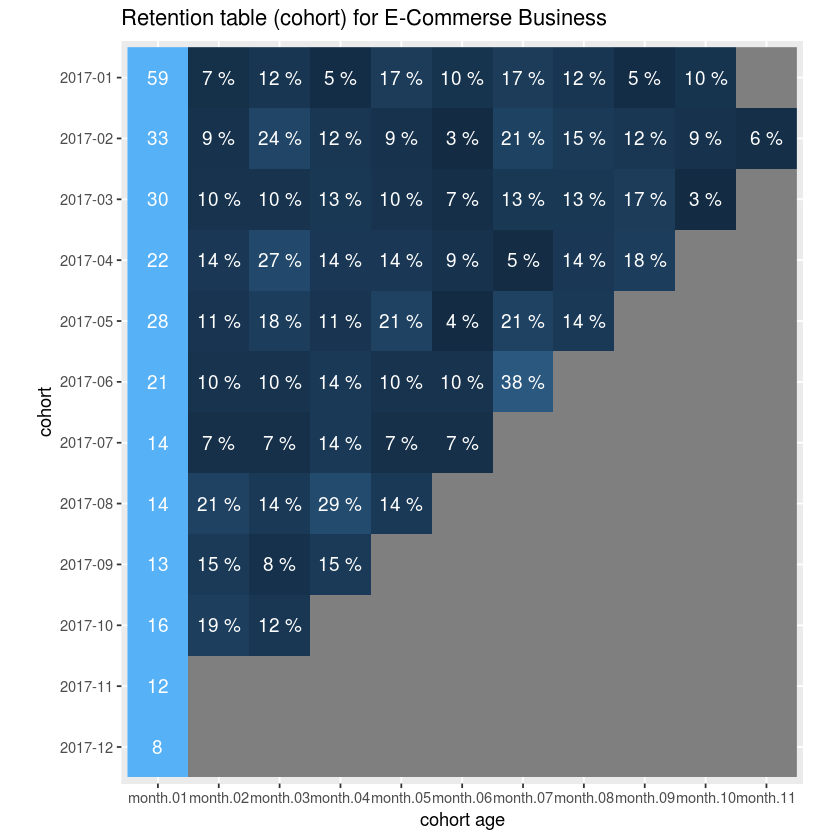

In [31]:
######################################################################################################################
#                                             PLOTS
######################################################################################################################

#ggplot loves long data.Let's melt it. One for the absolute values, one for the pcts
plotdata_abs <- gather(shifted,     "cohort_age", "people"  ,2:ncol(shifted    ))
plotdata_pct <- gather(shifted_pct, "cohort_age", "percent" ,2:ncol(shifted_pct))

# now add some data.. we need pretty labels..
# first bit is the length of the width of the wide column (minus 1, that's the cohort name)
# that contains the absolute numbers
# last bit is the rest, those are percentages.
labelnames <- c( plotdata_abs$people[1:(ncol(shifted)-1)],
                 plotdata_pct$percent[(ncol(shifted)):(nrow(plotdata_pct))])

# we need pretty labels.
pretty_print <- function(n) {
  case_when( n <= 1  ~ sprintf("%1.0f %%", n*100),
             n >  1  ~ as.character(n),
             TRUE    ~ " ") # for NA values, skip the label
}

# create the plot data
plotdata <- data.frame(
  cohort     = plotdata_pct$cohort,
  cohort_age = plotdata_pct$cohort_age,
  percentage = plotdata_pct$percent,
  label      = pretty_print(labelnames)
)

#plot (with reordered y axis, oldesr group on top)
p <- ggplot(plotdata, aes(x = cohort_age, y = reorder(cohort, desc(cohort)))) +
  geom_raster(aes(fill = percentage)) +
  #scale_fill_gradient(low = "white", high = "red") + coord_fixed() +
  scale_fill_continuous(guide = FALSE) + coord_equal(ratio = 1) + # no legend
  geom_text(aes(label = label), size = 4, color = "white") +
  xlab("cohort age") + ylab("cohort") + 
  ggtitle(paste("Retention table (cohort) for E-Commerse Business"))
plot(p)


As you can see from the graph above, the company needs to really work on retaining their customers

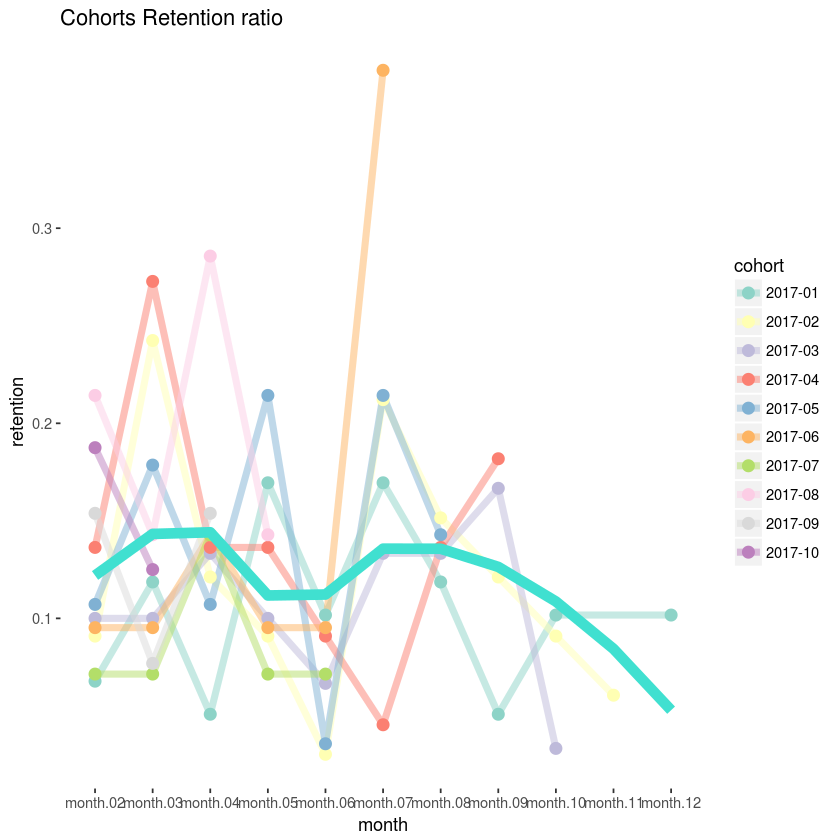

In [30]:
######################################################################################################################
#                                                  PLOT2
######################################################################################################################
a <- shifted[,c(2:13)]
b <- shifted[,2]
retention <- apply(a, 2, function(a) a/b )
retention <- data.frame(cohort=(shifted$cohort), retention)
retention <- retention[,-2]

cohort_plot <- melt(retention, id.vars = "cohort")
colnames(cohort_plot) <- c("cohort", "month", "retention")
cohort_plot <- filter(cohort_plot, retention != 0)
c <- ggplot(cohort_plot, aes(x=month, y=retention, group=cohort, colour=cohort))
c <-c + geom_line(size=2, alpha=0.5) +
  geom_point(size=3, alpha=1) +
  geom_smooth(aes(group=1), method = "loess", size=3, colour="turquoise", se=FALSE) +
  labs(title="Cohorts Retention ratio")

c + scale_colour_brewer(palette="Set3") + theme(panel.background = element_blank())


The above graph aslo shows retention ratio of the company

### Conclusion

These are just but a few of the things one can look at while doing cohort analysis. I'll try to update this notebook as often as possible as I come up with new use cases and new plots that companies and businesses could explore.

As for now: you could reach me my twitter page @data_cate or on Linkedin for suggestions, querries, complains or whatever:) Cheers